In [1]:
## TASK 2 SUBMISSION 
## USING BERT PRETRAINED MODEL FOR SENTIMENT ANALYSIS\
## TANAY TRIPATHI 3RD YEAR ENTC

In [2]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp36-none-any.whl size=30534 sha256=c4a7b27a2f98bcb136549b1e937d02d2d6875b60534112e0ae5e0c49cbcd023d
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.1-cp36-none-any.whl size=7849 sha256=787de84498cc604f3962a53109d533f1476e69e89690e4f5b47d7a0bea6f16fe
  Stored in directory: /root/.cache/pip/wheels/fd/13/cf/731530f5760266e69a40217ea27fa0d39a2d2a67230a73e2bc
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19474 sha256=de54524374368b01cef8640f24e63d2ffa4eb02a6a460e9a43925e3a7916d91f
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.2MB 13.7MB/s 


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

In [4]:
import pandas as pd
data = pd.read_csv('raw_data.csv')

In [5]:
from sklearn.model_selection import train_test_split
def new(covid,sentiment):
    if ((covid==1) & (sentiment==0)):
        score = 0
    elif ((covid==1) & (sentiment==1)):
        score = 1
    elif ((covid == 0) & (sentiment==0)):
        score = 2
    elif ((covid == 0) & (sentiment==1)):
        score = 3
    return score

c = data['Covid'].tolist()
s = data['Sentiment'].tolist()
score = []
for i  in range(0,4072):
    score.append(new(c[i],s[i]))
data['label'] = score

data = data[['Description','label']]



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


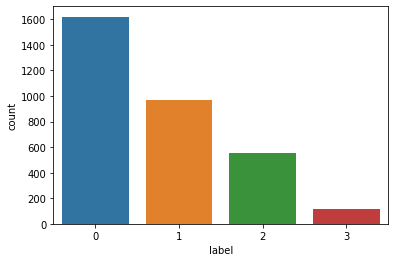

In [6]:
import seaborn as sns
sns.countplot(data.label)

In [7]:
import re
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [8]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [9]:
news = []
sentences = list(data['Description'])
for sen in sentences:
    news.append(preprocess_text(sen))

In [10]:
print(data.columns.values)

['Description' 'label']


In [11]:
import numpy as np
y = data['label']

y = np.array(y)

In [12]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [13]:
tokenizer.tokenize(news[0])

['vis',
 '##hwa',
 'hindu',
 'parish',
 '##ad',
 'v',
 '##hp',
 'and',
 'ram',
 'jan',
 '##ma',
 '##bh',
 '##oom',
 '##i',
 'ny',
 '##as',
 'leaders',
 'said',
 'that',
 'no',
 'grand',
 'celebrations',
 'for',
 'ram',
 'na',
 '##va',
 '##mi',
 'will',
 'be',
 'held',
 'in',
 'a',
 '##yo',
 '##dh',
 '##ya',
 'amid',
 'corona',
 '##virus',
 'outbreak',
 'smaller',
 'celebrations',
 'will',
 'happen',
 'after',
 'considering',
 'the',
 'local',
 'rules',
 'regarding',
 'health',
 'emergency',
 'v',
 '##hp',
 'official',
 'said',
 'for',
 'mass',
 'awakening',
 'we',
 'll',
 'ho',
 '##ist',
 'small',
 'sa',
 '##ff',
 '##ron',
 'flags',
 'at',
 'every',
 'hindu',
 'house',
 'across',
 'india',
 'the',
 'official',
 'added']

In [14]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(news[0]))

[25292,
 18663,
 7560,
 3583,
 4215,
 1058,
 22269,
 1998,
 8223,
 5553,
 2863,
 23706,
 17650,
 2072,
 6396,
 3022,
 4177,
 2056,
 2008,
 2053,
 2882,
 12035,
 2005,
 8223,
 6583,
 3567,
 4328,
 2097,
 2022,
 2218,
 1999,
 1037,
 7677,
 16425,
 3148,
 13463,
 21887,
 23350,
 8293,
 3760,
 12035,
 2097,
 4148,
 2044,
 6195,
 1996,
 2334,
 3513,
 4953,
 2740,
 5057,
 1058,
 22269,
 2880,
 2056,
 2005,
 3742,
 16936,
 2057,
 2222,
 7570,
 2923,
 2235,
 7842,
 4246,
 4948,
 9245,
 2012,
 2296,
 7560,
 2160,
 2408,
 2634,
 1996,
 2880,
 2794]

In [15]:
def tokenize_news(text_news):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_news))

In [16]:
tokenized_news = [tokenize_news(review) for review in news]

In [17]:
news_with_len = [[review, y[i], len(review)] for i, review in enumerate(tokenized_news)]

In [18]:
news_with_len.sort(key=lambda x: x[2])

In [19]:
sorted_news_labels = [(review_lab[0], review_lab[1]) for review_lab in news_with_len]

In [20]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_news_labels, output_types=(tf.int32, tf.int32))

In [21]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [22]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 51), dtype=int32, numpy=
 array([[ 3757,  1997,  6236, ...,     0,     0,     0],
        [ 1996,  3757,  1997, ...,     0,     0,     0],
        [ 1996,  2796,  2473, ...,     0,     0,     0],
        ...,
        [ 1996,  2193,  1997, ...,  5288,  3053,     0],
        [ 2035,  2430, 16410, ...,  1996,  4822,     0],
        [21887, 23350,  6677, ...,  1998,  1996,  2149]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int32)>)

In [23]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_news_labels) / BATCH_SIZE)
val_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
val_data = batched_dataset.take(val_BATCHES)
train_data = batched_dataset.skip(val_BATCHES)

In [24]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(units=4,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [25]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 4

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [26]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [27]:
text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [28]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
92/92 [==============================] - 25s 190ms/step - loss: 1.0814 - sparse_categorical_accuracy: 0.5258
Epoch 2/5
92/92 [==============================] - 5s 58ms/step - loss: 0.6817 - sparse_categorical_accuracy: 0.7113
Epoch 3/5
92/92 [==============================] - 5s 58ms/step - loss: 0.3532 - sparse_categorical_accuracy: 0.8870
Epoch 4/5
92/92 [==============================] - 5s 57ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9795
Epoch 5/5
92/92 [==============================] - 5s 58ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9914


In [29]:
results = text_model.evaluate(val_data)
print(results)

10/10 [==============================] - 1s 36ms/step - loss: 0.4864 - sparse_categorical_accuracy: 0.8719
[0.48642927408218384, 0.871874988079071]


In [94]:
news = []
text = "Maharashtra universities demand resumption of classroom teaching"
text_list = []
text_list.append(text)
sentences = list(text_list)
for sen in sentences:
    news.append(preprocess_text(sen))

tokenized_news = [tokenize_news(review) for review in news]
news_with_len = [[review, y[i], len(review)] for i, review in enumerate(tokenized_news)]
news_with_len.sort(key=lambda x: x[2])
sorted_news_labels = [(review_lab[0], review_lab[1]) for review_lab in news_with_len]
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_news_labels, output_types=(tf.int32, tf.int32))
BATCH_SIZE = 1
test_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))
next(iter(test_dataset))

(<tf.Tensor: shape=(1, 9), dtype=int32, numpy=
 array([[12434,  5534,  5157, 24501, 24237,  3508,  1997,  9823,  4252]],
       dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>)

In [95]:
next(iter(test_dataset))

(<tf.Tensor: shape=(1, 9), dtype=int32, numpy=
 array([[12434,  5534,  5157, 24501, 24237,  3508,  1997,  9823,  4252]],
       dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>)

In [96]:
result = text_model.predict(test_dataset)
print(np.argmax(result))

3


26/26 [==============================] - 0s 8ms/step - loss: 3.9259 - sparse_categorical_accuracy: 0.3681


[3.9258594512939453, 0.3680981695652008]